In [1]:
import pandas as pd

In [2]:
# replace with your own filepath
df1 = pd.read_csv(r"Representative_kinases (1)\Representative_kinases\Rep_kinases_dataset.csv", sep= "	")
df2 = pd.read_csv(r"Dark Matter.csv")

In [5]:
df2.head()

,SMILES,Class
0,Cc1cc(O)c(/N=C/c2ccc(-c3ccc(F)cc3)o2)cc1C,0
1,O=Cc1c2ccccc2c(Sc2ccccn2)c2ccccc12,0
2,Cc1ccc2[nH]c3c(c2c1)CCc1ccc(-c2ccccc2)nc1-3,0
3,c1csc(C2=Nc3ccccc3N[C@@H](c3cccs3)C2)c1,0
4,c1csc(C2=Nc3ccccc3N[C@H](c3cccs3)C2)c1,0


In [39]:
df1 = df1[["NonstereoAromaticSMILES", "p_standard_type", "p_value", "Kinase_name", "Kinase_family", "Kinase_group"]]
df1["log-1_value"] = - 10 ** df1["p_value"]
df1.head()

,NonstereoAromaticSMILES,p_standard_type,p_value,Kinase_name,Kinase_family,Kinase_group,log-1_value
0,CCCC(=O)Nc1n[nH]c2ncc(B3OC(C)(C)C(C)(C)O3)cc12,pIC50,6.45,GSK3A,GSK,CMGC,-2.818383e+06
1,CCCC(=O)Nc1n[nH]c2ncc(B3OC(C)(C)C(C)(C)O3)cc12,pIC50,6.45,GSK3B,GSK,CMGC,-2.818383e+06
2,Cc1c(Oc2ccc(C(C)N)cc2F)ccc2c1B(O)OC2,pIC50,7.81,PKCa,PKC,AGC,-6.456542e+07
3,Cc1c(Oc2ccc(C(C)N)cc2F)ccc2c1B(O)OC2,pIC50,8.75,PKACa,PKA,AGC,-5.623413e+08
4,Cc1c(Oc2ccc(C(C)N)cc2F)ccc2c1B(O)OC2,pIC50,7.86,BARK1,GRK,AGC,-7.244360e+07


In [10]:
print(f"Number of unique Kinases: {df1["Kinase_name"].value_counts()}\nNumber of unique Kinase Families: {df1["Kinase_family"].value_counts()}\nNumber of unique Kinase Groups: {df1["Kinase_group"].value_counts()}")

Number of unique Kinases: Kinase_name
KDR      5972
FLT1     4807
p110a    4105
JAK1     3990
JAK2     3950
         ... 
PDHK3       1
TTBK1       1
MLKL        1
ChaK2       1
CDK10       1
Name: count, Length: 420, dtype: int64
Number of unique Kinase Families: Kinase_family
VEGFR         11260
JakA          11002
PIK            8405
EGFR           7462
PIM            6715
              ...  
Bud32             4
WNK               2
VRK               2
TKL-Unique        1
TTBK              1
Name: count, Length: 103, dtype: int64
Number of unique Kinase Groups: Kinase_group
TK          58586
CMGC        17601
AGC         12564
CAMK        10867
Atypical    10452
Other        8663
STE          3456
TKL          3392
CK1          1428
Name: count, dtype: int64


In [3]:
from rdkit import Chem
from rdkit.Chem import Descriptors
Mols = [Chem.MolFromSmiles(i) for i in df1["NonstereoAromaticSMILES"]]
df1["Mol"] = Mols
df1["molwt"] = df1["Mol"].apply(Descriptors.MolWt)
df1["TPSA"] = df1["Mol"].apply(Descriptors.TPSA)
df1["logP"] = df1["Mol"].apply(Descriptors.MolLogP)
df1["HBD"] = df1["Mol"].apply(Descriptors.NumHDonors)
df1["HBA"] = df1["Mol"].apply(Descriptors.NumHAcceptors)


KeyboardInterrupt: 

In [21]:
Mols = [Chem.MolFromSmiles(i) for i in df2["SMILES"]]
df2["Mol"] = Mols
df2["molwt"] = df2["Mol"].apply(Descriptors.MolWt)
df2["TPSA"] = df2["Mol"].apply(Descriptors.TPSA)
df2["logP"] = df2["Mol"].apply(Descriptors.MolLogP)
df2["HBD"] = df2["Mol"].apply(Descriptors.NumHDonors)
df2["HBA"] = df2["Mol"].apply(Descriptors.NumHAcceptors)
df2.to_csv("Dark Matter (I'm not running descriptors again).csv")


In [5]:
df2 = pd.read_csv("Dark Matter (I'm not running descriptors again).csv")

In [6]:
df2.head()

,Unnamed: 0,SMILES,Class,Mol,molwt,TPSA,logP,HBD,HBA
0,0,Cc1cc(O)c(/N=C/c2ccc(-c3ccc(F)cc3)o2)cc1C,0,<rdkit.Chem.rdchem.Mol object at 0x000001D9E60...,309.340,45.73,5.15874,1,3
1,1,O=Cc1c2ccccc2c(Sc2ccccn2)c2ccccc12,0,<rdkit.Chem.rdchem.Mol object at 0x000001D9E60...,315.397,29.96,5.35170,0,3
2,2,Cc1ccc2[nH]c3c(c2c1)CCc1ccc(-c2ccccc2)nc1-3,0,<rdkit.Chem.rdchem.Mol object at 0x000001D9E60...,310.400,28.68,5.30392,1,1
3,3,c1csc(C2=Nc3ccccc3N[C@@H](c3cccs3)C2)c1,0,<rdkit.Chem.rdchem.Mol object at 0x000001D9E60...,310.447,24.39,5.48730,1,4
4,4,c1csc(C2=Nc3ccccc3N[C@H](c3cccs3)C2)c1,0,<rdkit.Chem.rdchem.Mol object at 0x000001D9E60...,310.447,24.39,5.48730,1,4


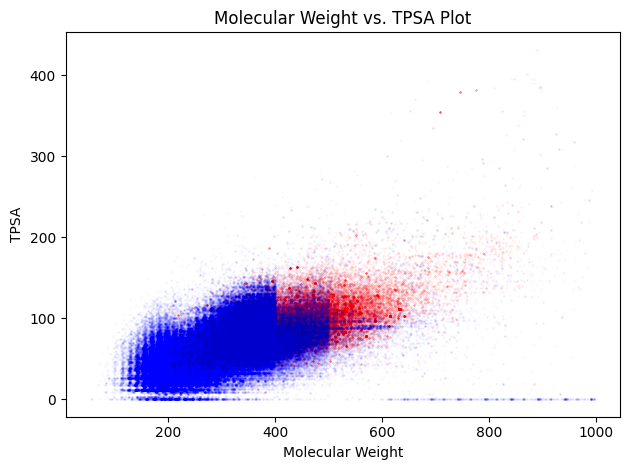

In [15]:
import matplotlib.pyplot as plt
plt.scatter(df1["molwt"], df1["TPSA"], color = "red", alpha= 0.05, s= 0.1)
plt.scatter(df2["molwt"], df2["TPSA"], color = "blue", alpha= 0.02, s= 1)
plt.xlabel("Molecular Weight")
plt.ylabel("TPSA")
plt.title("Molecular Weight vs. TPSA Plot")
plt.tight_layout()
plt.show()

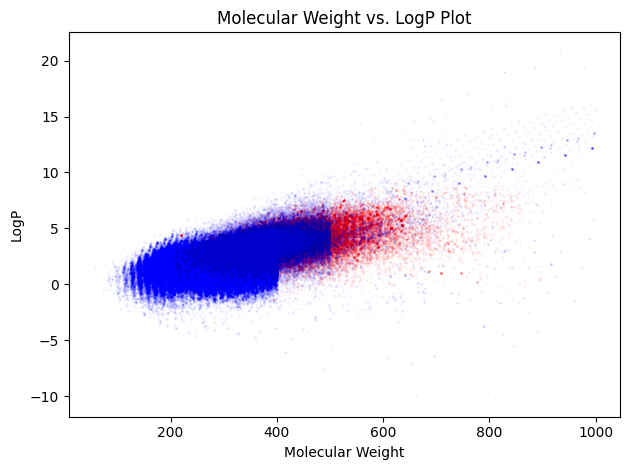

In [14]:
plt.scatter(df1["molwt"], df1["logP"], color = "red", alpha= 0.05, s= 0.1)
plt.scatter(df2["molwt"], df2["logP"], color = "blue", alpha= 0.02, s= 1)
plt.xlabel("Molecular Weight")
plt.ylabel("LogP")
plt.title("Molecular Weight vs. LogP Plot")
plt.tight_layout()
plt.show()

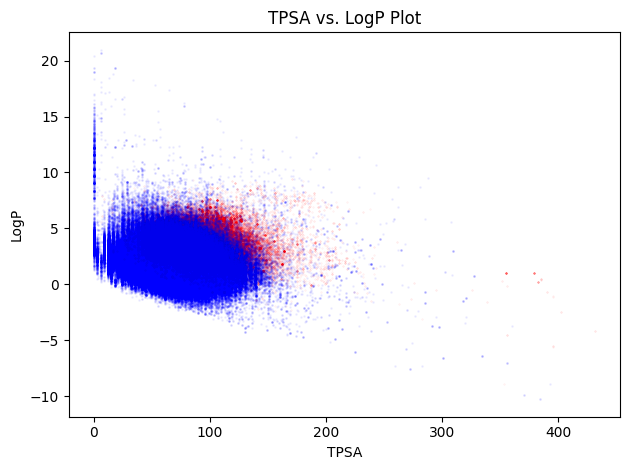

In [13]:
plt.scatter(df1["TPSA"], df1["logP"], color = "red", alpha= 0.05, s= 0.1)
plt.scatter(df2["TPSA"], df2["logP"], color = "blue", alpha= 0.05, s= 1)
plt.xlabel("TPSA")
plt.ylabel("LogP")
plt.title("TPSA vs. LogP Plot")
plt.tight_layout()
plt.show()

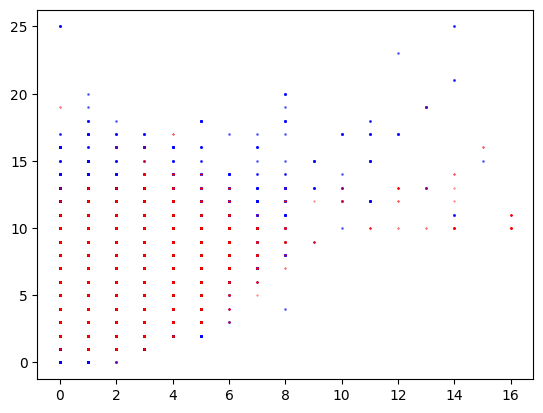

In [44]:
plt.scatter(df2["HBD"], df2["HBA"], color = "blue", alpha= 0.5, s= 1)
plt.scatter(df1["HBD"], df1["HBA"], color = "red", alpha= 0.5, s= 0.1)

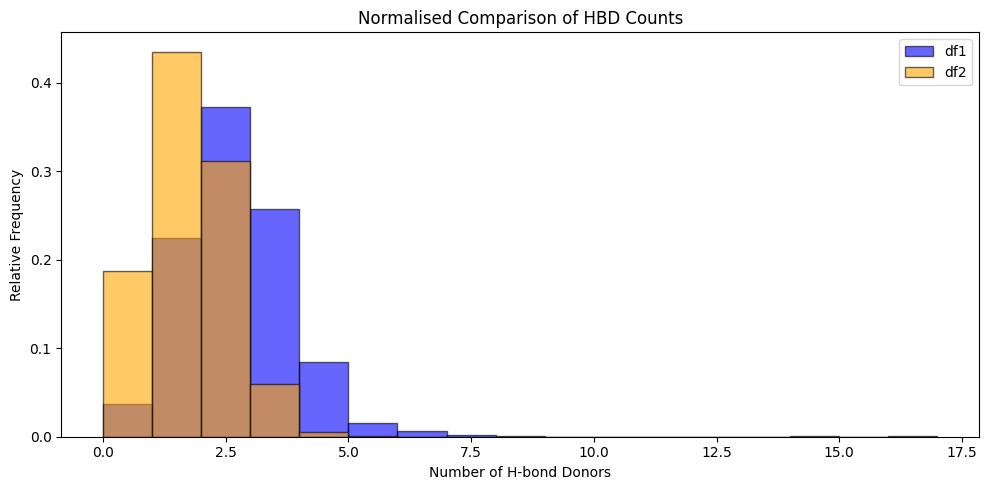

In [10]:
import matplotlib.pyplot as plt

hbd_bins = range(0, max(df1["HBD"].max(), df2["HBD"].max()) + 2)
hba_bins = range(0, max(df1["HBA"].max(), df2["HBA"].max()) + 2)

plt.figure(figsize=(10, 5))
plt.hist(df1["HBD"], bins=hbd_bins, alpha=0.6, label='df1', color='blue', edgecolor='black', density=True)
plt.hist(df2["HBD"], bins=hbd_bins, alpha=0.6, label='df2', color='orange', edgecolor='black', density=True)
plt.xlabel("Number of H-bond Donors")
plt.ylabel("Relative Frequency")
plt.title("Normalised Comparison of HBD Counts")
plt.legend()
plt.tight_layout()
plt.show()

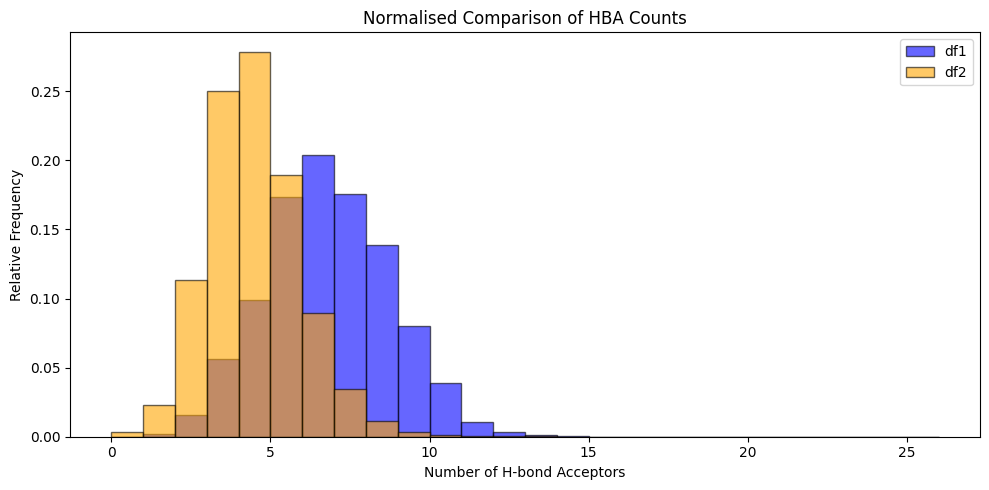

In [11]:
plt.figure(figsize=(10, 5))
plt.hist(df1["HBA"], bins=hba_bins, alpha=0.6, label='df1', color='blue', edgecolor='black', density=True)
plt.hist(df2["HBA"], bins=hba_bins, alpha=0.6, label='df2', color='orange', edgecolor='black', density=True)
plt.xlabel("Number of H-bond Acceptors")
plt.ylabel("Relative Frequency")
plt.title("Normalised Comparison of HBA Counts")
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
# CLEANING & CLASSIFYING DATA

In [ ]:
# adopt range, lets say <5 nM, is active (not actual value)
# OR/ classify dataset 1 as active

In [101]:
df1 = pd.read_csv(r"Representative_kinases (1)\Representative_kinases\Rep_kinases_dataset.csv", sep= "	")
df2 = pd.read_csv("Dark Matter (I'm not running descriptors again).csv")

df1 = df1[df1["p_standard_type"] == "pIC50"]

In [103]:
print(
    df2.shape,
    df1.shape,
    #df_range.shape
)

(784140, 9) (84838, 12)


In [58]:
"""
#2 for df_range, class = 1 IF p_value > 7.4
# https://jcheminf.biomedcentral.com/articles/10.1186/s13321-025-00998-2 for range
df_range1 = df_range[df_range["p_value"] > 7.4]
df_range2 = df_range[df_range["p_value"] <= 7.4]
# 7.4 also happens to give a very even split (good thing, allows for a decently robust regressor using only dataset 1 / any model using just ds1)
df_range2.shape
# Recombine
df_range = pd.concat([df_range1, df_range2], ignore_index= True)
"""
# Hypothetical / Depricated

(41250, 12)

In [67]:
# Clean into subgroups (printed list above), best divisor is probably kinase_group or kinase_name, otherwise we will have issues
# start w/ df_1, kinase_names and kinase_group

print(f"\nNumber of unique Kinases (count > 2500):\n{df1['Kinase_name'].value_counts()[df1['Kinase_name'].value_counts() > 2500]}\n")
print(f"Number of unique Kinases Groups (count > 10,000):\n{df1['Kinase_group'].value_counts()[df1['Kinase_group'].value_counts() > 10000]}\n")
# We have 10 Kinases and 5 Kinase Groups, not awful


Number of unique Kinases (count > 2500):
Kinase_name
KDR      5972
FLT1     4807
p110a    4105
JAK1     3990
JAK2     3950
ErbB2    3626
EGFR     3608
PIM1     2744
ROCK1    2684
ABL1     2539
Name: count, dtype: int64

Number of unique Kinases Groups (count > 10,000):
Kinase_group
TK          58586
CMGC        17601
AGC         12564
CAMK        10867
Atypical    10452
Name: count, dtype: int64



In [104]:
df1 = df1[["NonstereoAromaticSMILES", "Kinase_name", "Kinase_group", "p_value"]]

In [105]:
# Assign each dataframe to a dictionary (for iteration)

df_KDR = df1[df1["Kinase_name"] == "KDR"]
df_FLT1 = df1[df1["Kinase_name"] == "FLT1"]
df_p110a = df1[df1["Kinase_name"] == "p110a"]
df_JAK1 = df1[df1["Kinase_name"] == "JAK1"]
df_JAK2 = df1[df1["Kinase_name"] == "JAK2"]
df_ErbB2 = df1[df1["Kinase_name"] == "ErbB2"]
df_EGFR = df1[df1["Kinase_name"] == "EGFR"]
df_PIM1 = df1[df1["Kinase_name"] == "PIM1"]
df_ROCK1 = df1[df1["Kinase_name"] == "ROCK1"]
df_ABL1 = df1[df1["Kinase_name"] == "ABL1"]

Kinase_targets = {
    "KDR": df_KDR,
    "FLT1": df_FLT1,
    "p110a": df_p110a,
    "JAK1": df_JAK1,
    "JAK2": df_JAK2,
    "ErbB2": df_ErbB2,
    "EGFR": df_EGFR,
    "PIM1": df_PIM1,
    "ROCK1": df_ROCK1,
    "ABL1": df_ABL1
}

df_TK = df1[df1["Kinase_group"] == "TK"]
df_CMGC = df1[df1["Kinase_group"] == "CMGC"]
df_AGC = df1[df1["Kinase_group"] == "AGC"]
df_CAMK = df1[df1["Kinase_group"] == "CAMK"]
df_Atypical = df1[df1["Kinase_group"] == "Atypical"]

Kinase_group_targets = {
    "TK": df_TK,
    "CMGC": df_CMGC,
    "AGC": df_AGC,
    "CAMK": df_CAMK,
    "Atypical": df_Atypical,
}

In [106]:
# Sort each dataframe within dict by pIC50 val
for kinase_name, df in Kinase_targets.items():
    df_pos = df[df["p_value"] > 7.4].copy()
    df_pos.loc[:, "Class"] = 1
    df_neg = df[df["p_value"] <= 7.4].copy()
    df_neg.loc[:, "Class"] = 0
    Kinase_targets[kinase_name] = pd.concat([df_pos, df_neg], ignore_index=True)


for kinase_group, df in Kinase_group_targets.items():
    df_pos = df[df["p_value"] > 7.4].copy()
    df_pos.loc[:, "Class"] = 1
    df_neg = df[df["p_value"] <= 7.4].copy()
    df_neg.loc[:, "Class"] = 0
    Kinase_group_targets[kinase_group] = pd.concat([df_pos, df_neg], ignore_index=True)

In [ ]:
# The same methodology can be applied to df_range, I'm not arsed (also the above cell is not needed as everything is assumed to be pre-classified)

In [ ]:
# Chem. Space plots could be applied per group / per kinase target?